# Dataset Exploration: ScreenSpot V2 & SROIE

This notebook allows you to visualize examples from the supported datasets: **ScreenSpot V2** (UI Grounding) and **SROIE** (Receipt OCR).

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from datasets import load_dataset
from PIL import Image
import numpy as np
import random

In [2]:
# CONFIGURATION
# ---------------------
# Set DATASET_NAME to 'screenspot' or 'sroie'
DATASET_NAME = "sroie" 

DATASET_CONFIGS = {
    "screenspot": {
        "id": "HongxinLi/ScreenSpot_v2",
        "split": "test",
        "type": "grounding"
    },
    "sroie": {
        "id": "rajistics/sroie",
        "split": "train",
        "type": "extraction"
    }
}

In [3]:
# Load Dataset
cfg = DATASET_CONFIGS[DATASET_NAME]
print(f"Loading {cfg['id']} ({cfg['split']} split)...")

try:
    dataset = load_dataset(cfg["id"], split=cfg["split"], trust_remote_code=True)
except Exception as e:
    print(f"Warning: {e}")
    print("Retrying without trust_remote_code...")
    dataset = load_dataset(cfg["id"], split=cfg["split"])

print(f"Loaded {len(dataset)} examples.")

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'rajistics/sroie' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.


Loading rajistics/sroie (train split)...
Loaded 626 examples.


In [4]:
def show_example(example, index):
    image = example["image"]
    w, h = image.size
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()
    
    title_text = f"Example {index}"
    
    if cfg["type"] == "grounding":
        instruction = example.get("instruction", "No Instruction")
        bbox = example.get("bbox", None)
        point = example.get("point", None)
        title_text += f"\nInstruction: {instruction}"
        
        # ScreenSpot bbox is normalized [x1, y1, x2, y2]
        if bbox:
            rect = patches.Rectangle(
                (bbox[0]*w, bbox[1]*h), 
                (bbox[2]-bbox[0])*w, 
                (bbox[3]-bbox[1])*h, 
                linewidth=3, edgecolor='r', facecolor='none'
            )
            ax.add_patch(rect)
            print(f"BBox: {bbox}")
            
        if point:
             plt.plot(point[0]*w, point[1]*h, 'bx', markersize=15, markeredgewidth=3)
             print(f"Point: {point}")
             
    elif cfg["type"] == "extraction":
        # SROIE (rajistics version) has XML-like text tags
        text = example.get("text", "")
        print(f"--- Ground Truth Text (Example {index}) ---\n{text}\n{'-'*40}")
        title_text += "\n(See output for text)"

    plt.title(title_text)
    plt.axis('off')
    plt.show()

--- Ground Truth Text (Example 604) ---
<s><s_total>121.90</s_total><s_date>26/05/2018</s_date><s_company>KEDAI PAPAN YEW CHUAN</s_company><s_address>LOT 276 JALAN BANTING 43800 DENGKIL, SELANGOR</s_address></s>
----------------------------------------


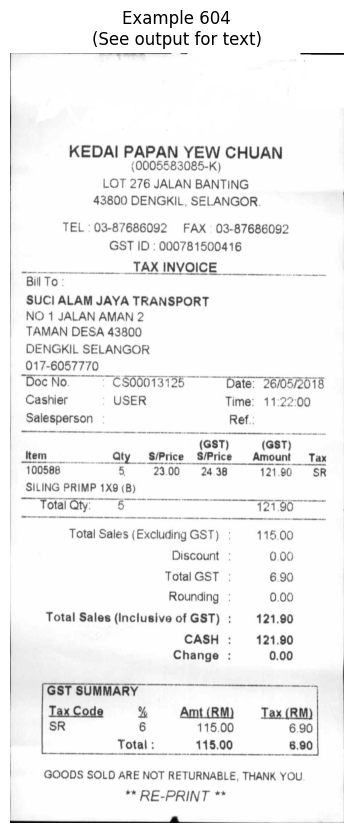

--- Ground Truth Text (Example 342) ---
<s><s_total>19.31</s_total><s_date>05/08/2017</s_date><s_company>GARDENIA BAKERIES (KL) SDN BHD</s_company><s_address>LOT 3, JALAN PELABUR 23/1, 40300 SHAH ALAM, SELANGOR.</s_address></s>
----------------------------------------


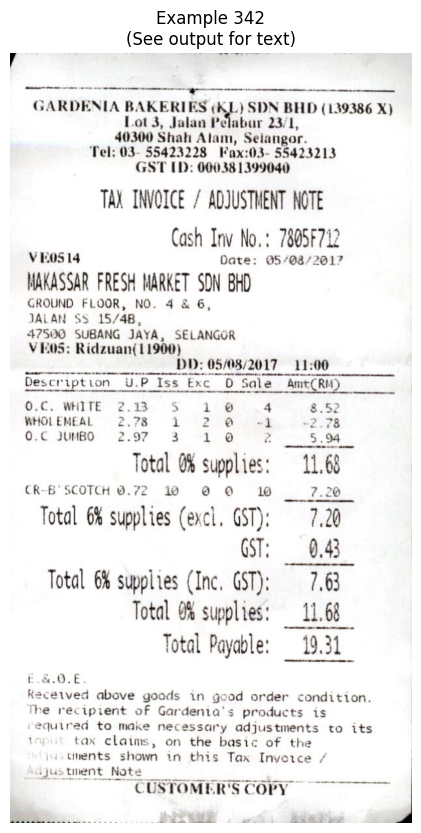

--- Ground Truth Text (Example 610) ---
<s><s_total>85.20</s_total><s_date>20/06/2018</s_date><s_company>GH DISTRIBUTOR & MARKETING SDN BHD</s_company><s_address>216, MACALISTER ROAD, 10400 PENANG, 10400 PENANG.</s_address></s>
----------------------------------------


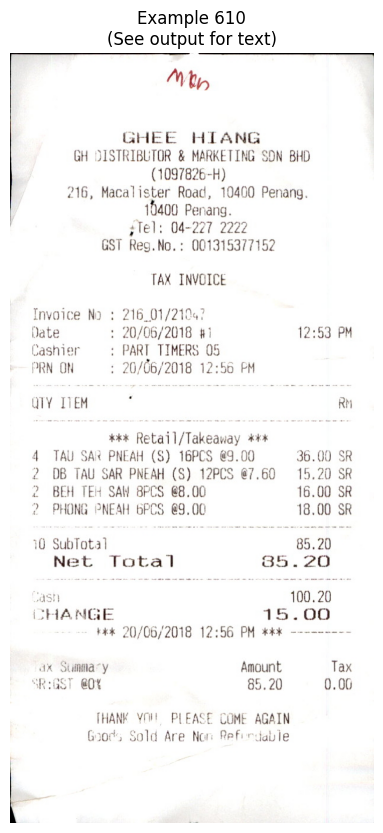

--- Ground Truth Text (Example 571) ---
<s><s_total>68.00</s_total><s_date>04-06-2018</s_date><s_company>MIZU MENTAI SDN. BHD.</s_company><s_address>NO: 1-1&2 GROUND FLOOR, JLN TEMENGGUNG 13/9, 43200 CHERAS SELANGOR.</s_address></s>
----------------------------------------


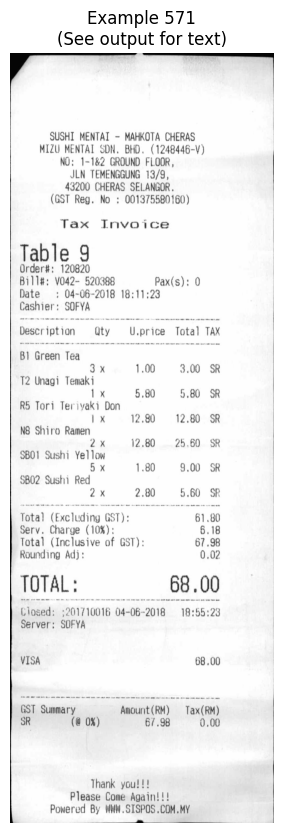

--- Ground Truth Text (Example 595) ---
<s><s_total>65.70</s_total><s_date>28-04-2018</s_date><s_company>ONE ONE THREE SEAFOOD RESTAURANT SDN BHD</s_company><s_address>NO.1, TAMAN SRI DENGKIL, JALAN AIR HITAM 43800 DENGKIL, SELANGOR.</s_address></s>
----------------------------------------


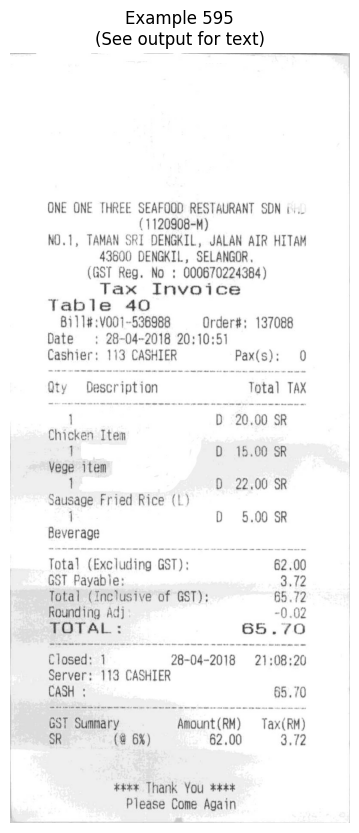

--- Ground Truth Text (Example 600) ---
<s><s_total>4.70</s_total><s_date>09/05/2018</s_date><s_company>MEGAH RETAIL SDN BHD</s_company><s_address>3-7, GROUND FLOOR, JLN PURTA DENGKIL 1 TMN PUTRA DENGKIL 43800 DENGKIL, SELANGOR DARUL EHSAN</s_address></s>
----------------------------------------


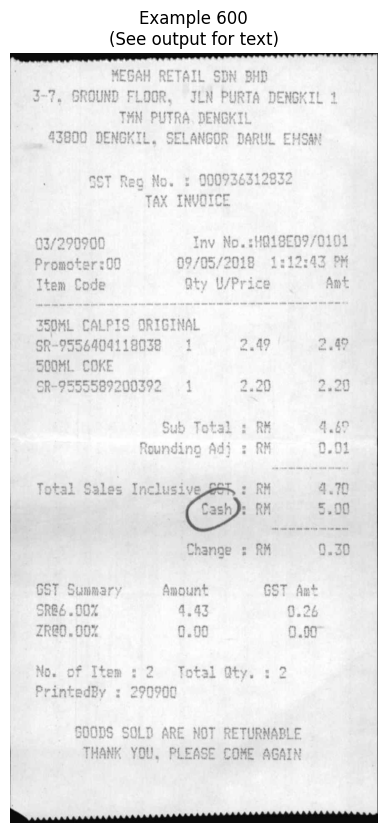

--- Ground Truth Text (Example 43) ---
<s><s_total>190.00</s_total><s_date>10-03-2018</s_date><s_company>32 PUB & BISTRO OWN BY CNU TRADING</s_company><s_address>78G, JALAN SS21/62, DAMANSARA UTAMA, 47400 PETALING JAYA.</s_address></s>
----------------------------------------


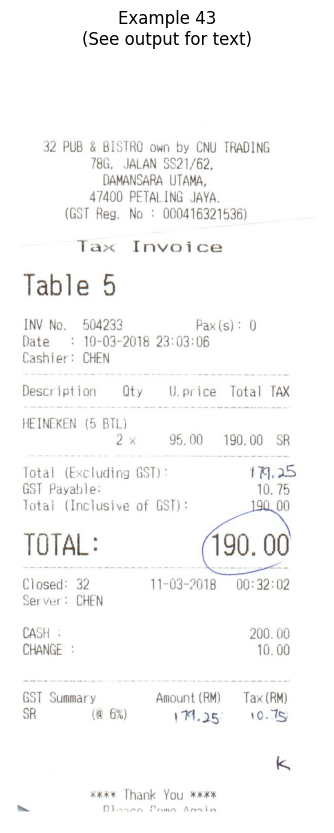

--- Ground Truth Text (Example 142) ---
<s><s_total>2.30</s_total><s_date>14-03-2018</s_date><s_company>RESTORAN WAN SHENG</s_company><s_address>NO.2, JALAN TEMENGGUNG 19/9, SEKSYEN 9, BANDAR MAHKOTA CHERAS, 43200 CHERAS, SELANGOR</s_address></s>
----------------------------------------


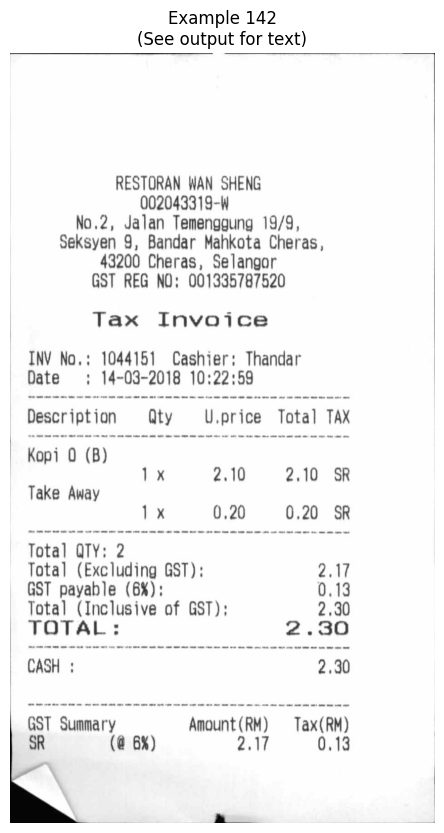

--- Ground Truth Text (Example 97) ---
<s><s_total>21.00</s_total><s_date>12/01/18</s_date><s_company>POPULAR BOOK CO. (M) SDN BHD</s_company><s_address>NO 8, JALAN 7/118B, DESA TUN RAZAK 56000 KUALA LUMPUR, MALAYSIA</s_address></s>
----------------------------------------


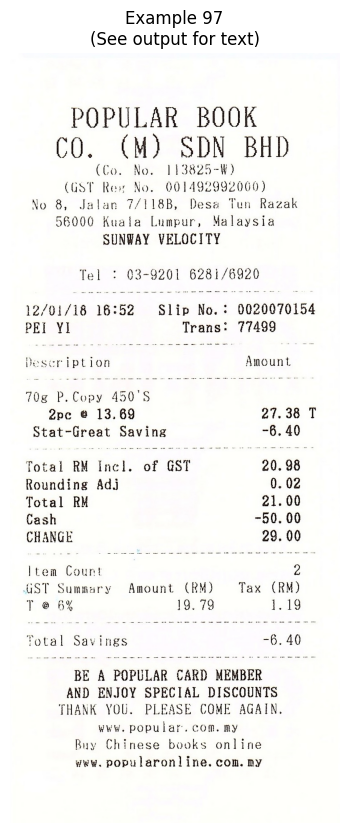

--- Ground Truth Text (Example 316) ---
<s><s_total>1.38</s_total><s_date>30-04-2018</s_date><s_company>WESTERN EASTERN STATIONERY SDN. BHD</s_company><s_address>42-46, JLN SULTAN AZLAN SHAH 51200 KUALA LUMPUR</s_address></s>
----------------------------------------


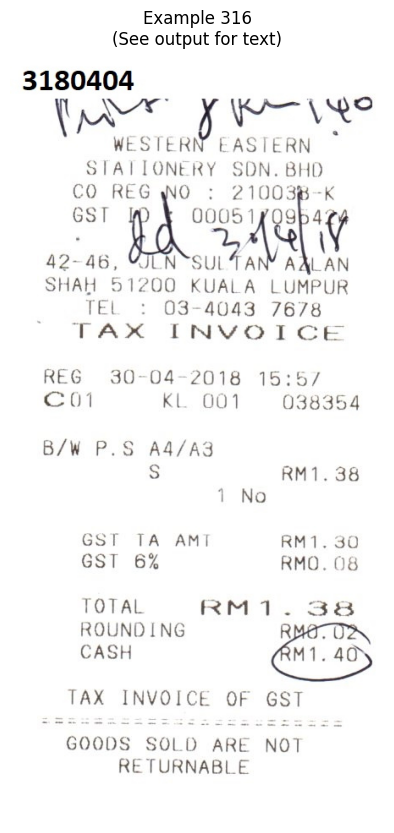

In [5]:
# Visualize 10 Random Samples
num_samples = 10
indices = random.sample(range(len(dataset)), min(num_samples, len(dataset)))

for i in indices:
    show_example(dataset[i], i)